In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
data = pd.read_csv("data-comp/train_dataset.csv")
data = data.loc[:,"url_len":]
data.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [11]:
data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [12]:
data.dropna(inplace=True)

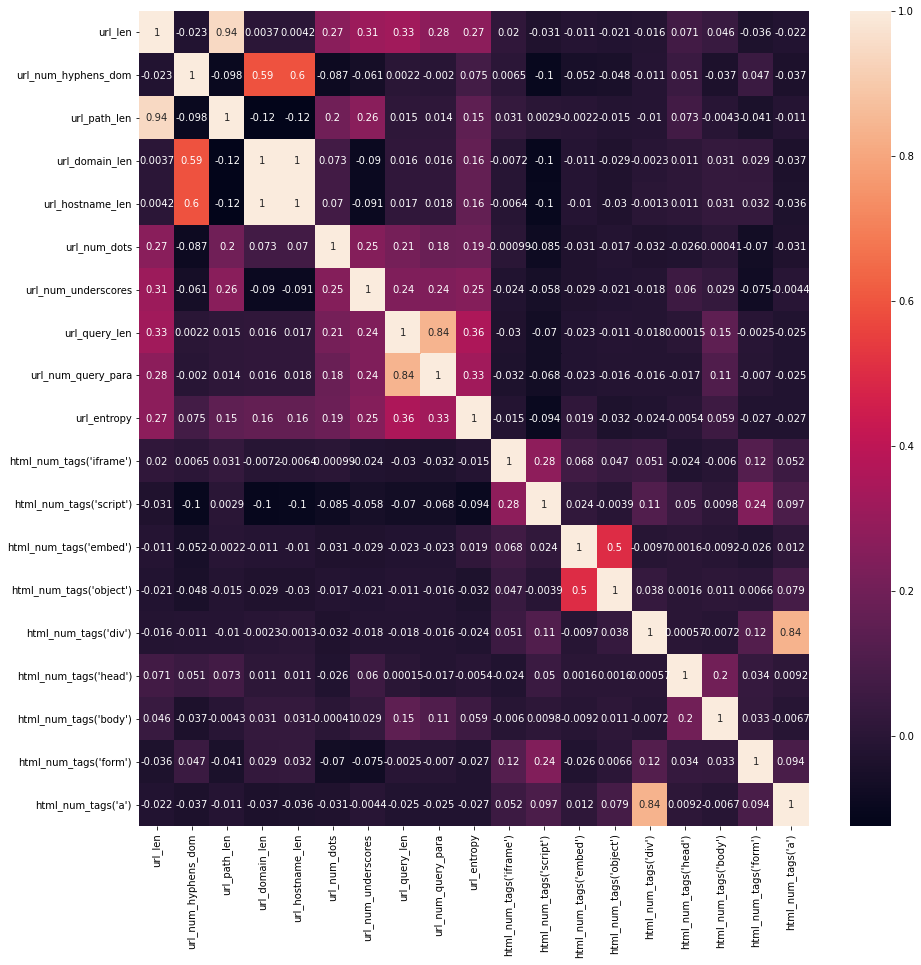

In [16]:
drop_cols = ["html_num_tags('applet')", 'url_chinese_present']

categorical = ['target', 'url_ip_present', 'url_port']
numerical = list(filter(lambda x: not x in categorical + drop_cols, data.columns))

plt.figure(figsize=(15, 15))
sns.heatmap(data[numerical].corr(), annot=True)
plt.show()

### **강한 상관관계**

- a tag의 개수와 div tag의 개수
- query 파라미터 개수와 query 길이
- hostname 길이와 하이픈 개수
- domain name 길이와 하이픈 개수
- domain 길이와 hostname 길이 (1)
- url 길이와 url path 길이

In [13]:
spst.pearsonr(data["html_num_tags('a')"], data["html_num_tags('div')"])

(0.8351091982998333, 0.0)

In [14]:
spst.pearsonr(data["url_len"], data["url_path_len"])

(0.9430604496681017, 0.0)

In [15]:
spst.pearsonr(data["url_hostname_len"], data["url_domain_len"])

(0.9989489841453435, 0.0)



### **중간 상관관계**

- object tag 개수와, embed tag의 개수
- query 길이와 url 복잡도
- query 파라미터 개수와 url 복잡도
- url 언더바 개수와 url 길이
- query 길이와 url 길이
